In [5]:
import requests
import pandas as pd
import pprint
import matplotlib.pyplot as plt

api_key = "a1cb41a49a32541884d183c47835f12776b1750a"
base_url = "https://api.census.gov/data/2020/dec/pl"

params = {
    'get': 'NAME,P1_001N',  # Unemployed, Employed, Total Population (16+)
    'for': 'state:*',  # Get data for all states
    #'key': api_key     # Your API key
}

In [2]:
# Make the API request

#final_url = f"{base_url}"

response = requests.get(base_url, params=params)

#response = response.json()



# Check if the response was successful
if response.status_code == 200:
    data = response.json()
    pprint.pprint(data)
    df = pd.DataFrame(data[1:], columns=data[0])  # Extract columns and data
    # Convert relevant columns to numeric
    # df['B23025_003E'] = pd.to_numeric(df['B23025_003E'], errors='coerce')  # Unemployed
    # df['B23025_005E'] = pd.to_numeric(df['B23025_005E'], errors='coerce')  # Employed
    # df['B23025_001E'] = pd.to_numeric(df['B23025_001E'], errors='coerce')  # Total Population
    df['P1_001N'] = pd.to_numeric(df['P1_001N'], errors='coerce')

    # Calculate unemployment rate
    #df['Unemployment_Rate'] = (df['B23025_003E'] / df['B23025_001E']) * 100  # Unemployment rate in %
    
    # Show the result
    #print(df[['NAME', 'Unemployment_Rate']])
    #df.head()
else:
    print("Error:", response.status_code)


[['NAME', 'P1_001N', 'state'],
 ['Pennsylvania', '13002700', '42'],
 ['California', '39538223', '06'],
 ['West Virginia', '1793716', '54'],
 ['Utah', '3271616', '49'],
 ['New York', '20201249', '36'],
 ['District of Columbia', '689545', '11'],
 ['Alaska', '733391', '02'],
 ['Florida', '21538187', '12'],
 ['South Carolina', '5118425', '45'],
 ['North Dakota', '779094', '38'],
 ['Maine', '1362359', '23'],
 ['Georgia', '10711908', '13'],
 ['Alabama', '5024279', '01'],
 ['New Hampshire', '1377529', '33'],
 ['Oregon', '4237256', '41'],
 ['Wyoming', '576851', '56'],
 ['Arizona', '7151502', '04'],
 ['Louisiana', '4657757', '22'],
 ['Indiana', '6785528', '18'],
 ['Idaho', '1839106', '16'],
 ['Connecticut', '3605944', '09'],
 ['Hawaii', '1455271', '15'],
 ['Illinois', '12812508', '17'],
 ['Massachusetts', '7029917', '25'],
 ['Texas', '29145505', '48'],
 ['Montana', '1084225', '30'],
 ['Nebraska', '1961504', '31'],
 ['Ohio', '11799448', '39'],
 ['Colorado', '5773714', '08'],
 ['New Jersey', '928

<Axes: xlabel='date'>

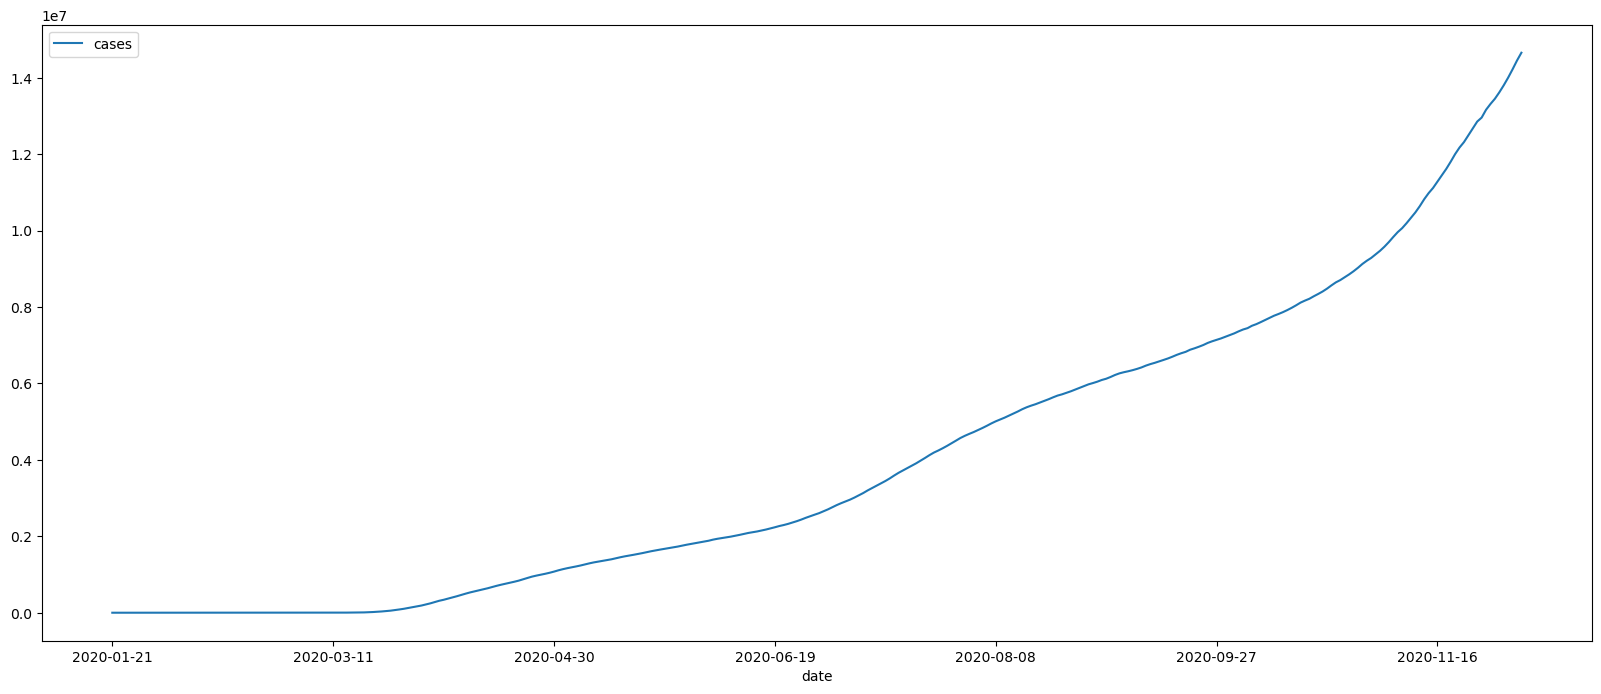

In [3]:
counties_covid = "../Project 1/Data/us_counties_covid19_daily.csv"

counties_covid_df = pd.read_csv(counties_covid)

counties_covid_df = counties_covid_df[["date", "county", "state", "cases", "deaths"]]

counties_covid_df.head()

date_df = counties_covid_df.groupby("date").sum()

date_df

date_df.plot(y = "cases", kind = "line", figsize = (20, 8))

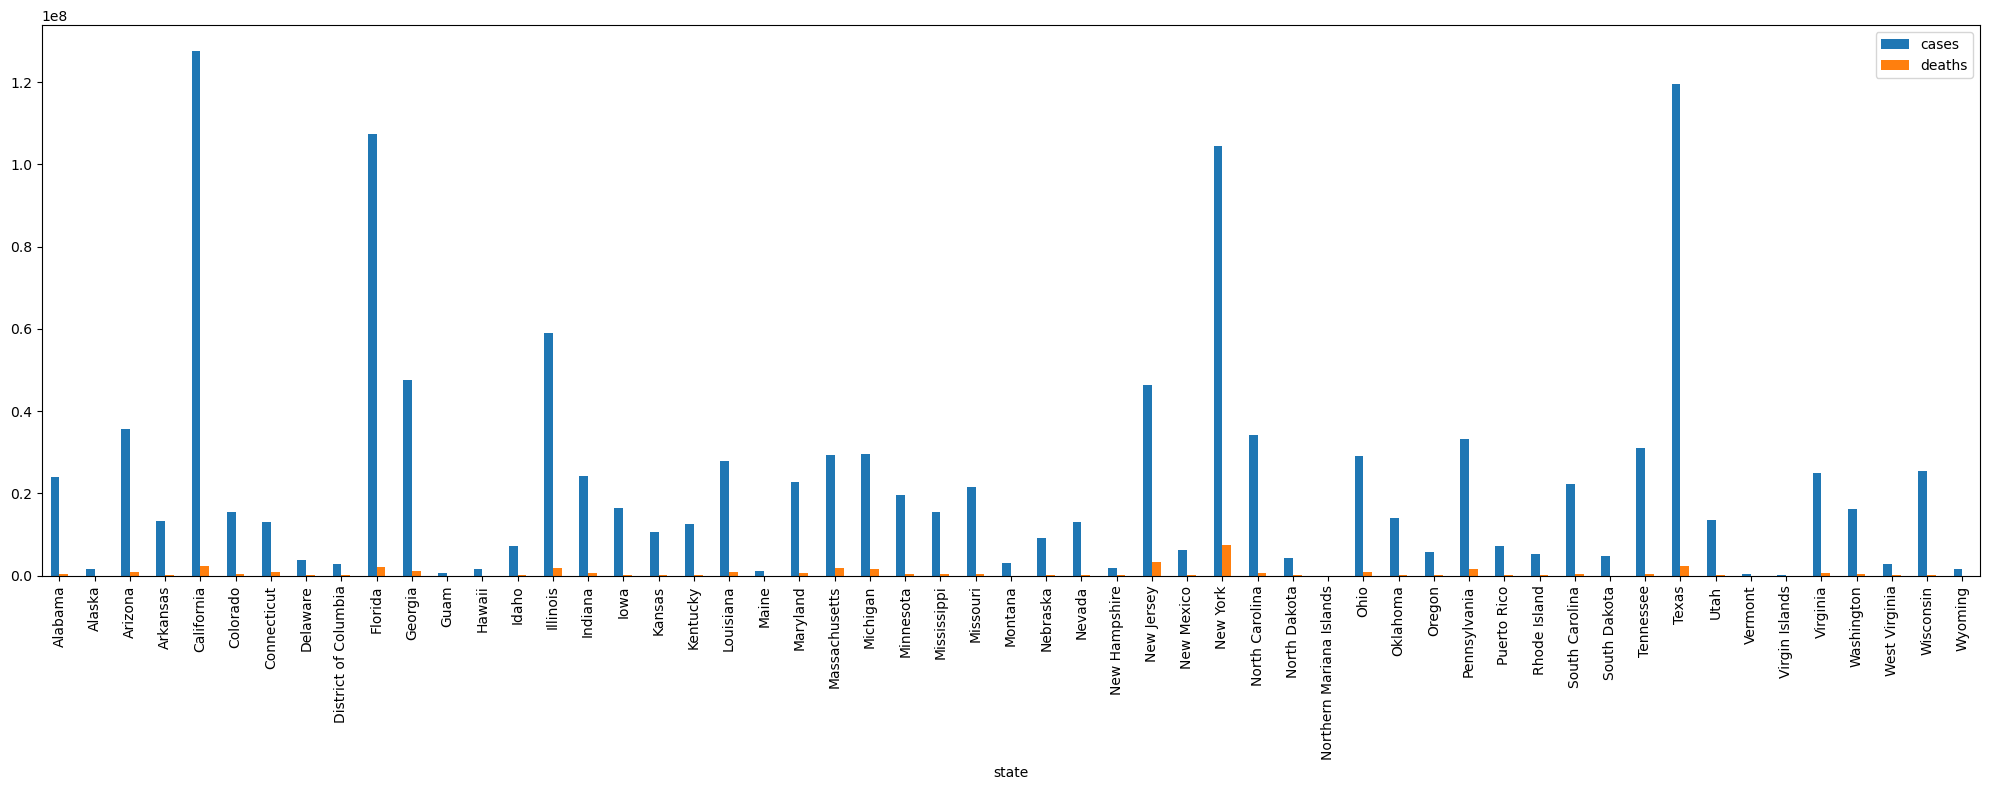

In [4]:
counties_covid_df.head()

c_df = counties_covid_df.groupby("state").sum()

c_df.plot(kind = "bar", figsize = (20, 8))

plt.tight_layout()

plt.show()

Skipping Guam
Skipping Northern Mariana Islands
Skipping Virgin Islands
{'Alabama': 5024279, 'Alaska': 733391, 'Arizona': 7151502, 'Arkansas': 3011524, 'California': 39538223, 'Colorado': 5773714, 'Connecticut': 3605944, 'Delaware': 989948, 'District of Columbia': 689545, 'Florida': 21538187, 'Georgia': 10711908, 'Hawaii': 1455271, 'Idaho': 1839106, 'Illinois': 12812508, 'Indiana': 6785528, 'Iowa': 3190369, 'Kansas': 2937880, 'Kentucky': 4505836, 'Louisiana': 4657757, 'Maine': 1362359, 'Maryland': 6177224, 'Massachusetts': 7029917, 'Michigan': 10077331, 'Minnesota': 5706494, 'Mississippi': 2961279, 'Missouri': 6154913, 'Montana': 1084225, 'Nebraska': 1961504, 'Nevada': 3104614, 'New Hampshire': 1377529, 'New Jersey': 9288994, 'New Mexico': 2117522, 'New York': 20201249, 'North Carolina': 10439388, 'North Dakota': 779094, 'Ohio': 11799448, 'Oklahoma': 3959353, 'Oregon': 4237256, 'Pennsylvania': 13002700, 'Puerto Rico': 3285874, 'Rhode Island': 1097379, 'South Carolina': 5118425, 'South 

<Axes: xlabel='state'>

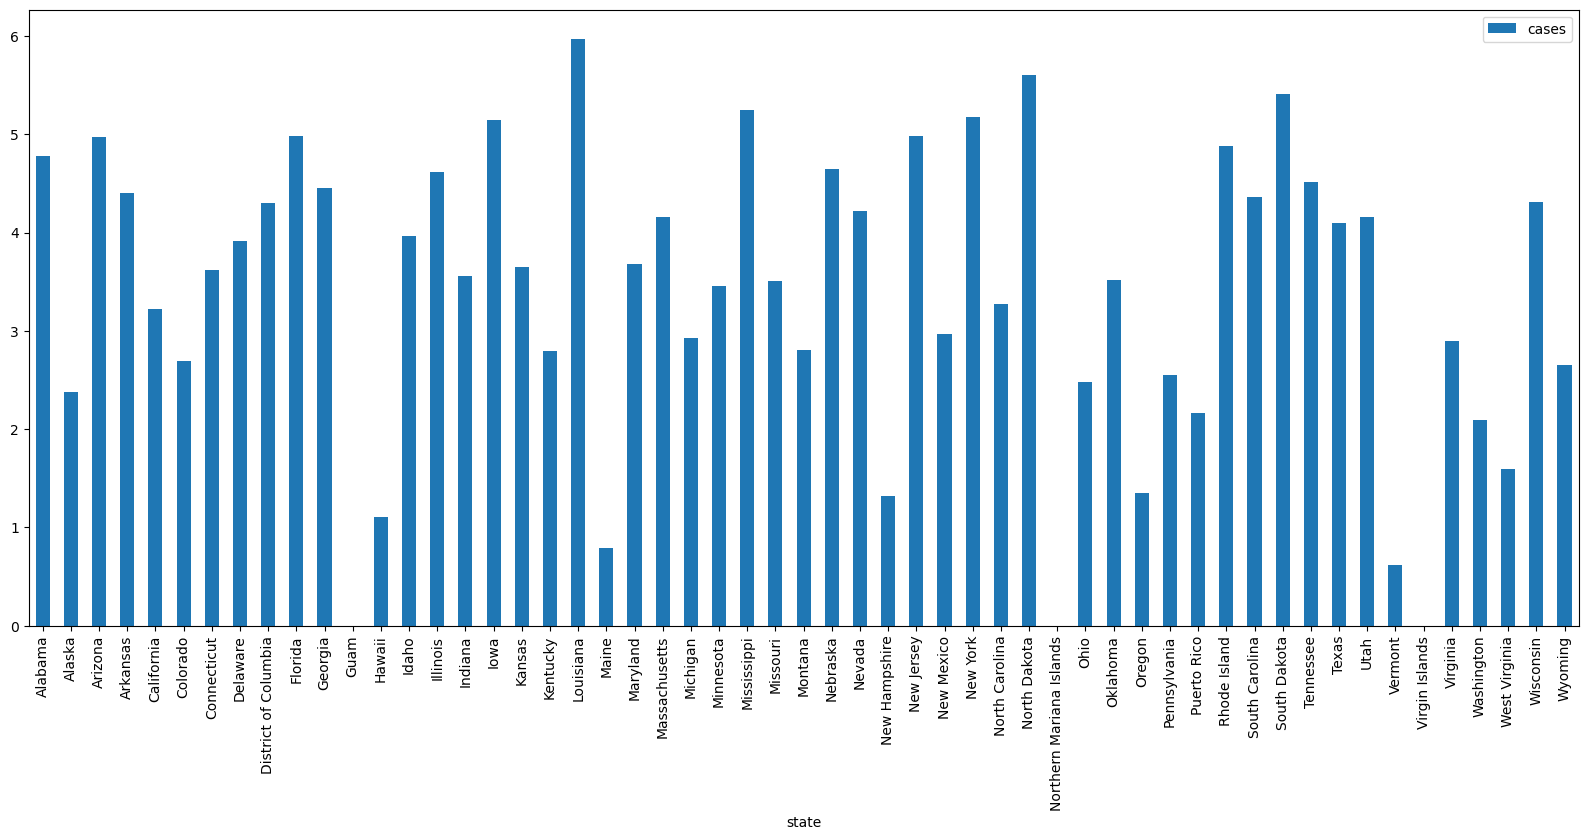

In [5]:
per_10K = c_df

pop_df = df.set_index("NAME")

pop_df.loc["Florida"]["P1_001N"]

#new_df = pd.merge()

total_populations = {}

for index, row in c_df.iterrows():
    try:
        total_populations[index] = pop_df.loc[index]["P1_001N"]
    except:
        print(f"Skipping {index}")
        per_10K.drop(index)

print(total_populations)

p = pd.Series(total_populations)
p.head()

per_10K["Total Pop"] = p
per_10K["cases"] = per_10K["cases"] / per_10K["Total Pop"]
per_10K["deaths"] = per_10K["deaths"] / per_10K["Total Pop"]
#per_10K
#per_10K["cases"] = per_10K["cases"] / total_populations

per_10K.plot(y = "cases", kind= "bar", figsize = (20, 8))

#per_10K.head()



In [90]:
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Colombia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
s_series = pd.Series(states)

m_states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Colombia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
m_series = pd.Series(m_states)

def drop_misc(h):
    h.drop(h[h["location_key"] == "US"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_VI"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_CA_SFO"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_GU"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_AS"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_MP"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_PR"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36005"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36047"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36061"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36081"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36085"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_NYC"].index, inplace = True)

In [114]:
demo_csv = pd.read_csv("../Project 1/Data/demographics.csv")

demo_df = pd.DataFrame(demo_csv)
h = demo_df
h.drop(["population_rural", "population_urban", "population_largest_city", "population_clustered", "population_density", "human_development_index"], axis = 1, inplace = True)
#h = h.dropna()
us_main = h.loc[(h["location_key"].str)[:2] == "US"]
us_main = us_main.loc[(h["location_key"].str.len() <= 5)]
us_main

states_df = us_main
#us_main

states_df.drop(us_main[us_main["location_key"] == "US"].index, inplace = True)
drop_misc(states_df)
#states_df = states_df.dropna()
states_df["location_key"] = states_df["location_key"].str[3:]
states_df

#states_df.plot(xticks = "location_key", y = "population", kind = "bar")

,location_key,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
18284,AK,733391.0,424916.0,391925.0,115198.0,111045.0,128022.0,113254.0,102310.0,116061.0,82608.0,35021.0,13322.0
18314,AL,5024279.0,2512466.0,2681479.0,621981.0,660970.0,701742.0,680141.0,613936.0,666838.0,645125.0,414601.0,188612.0
18382,AR,3011524.0,1585221.0,1654473.0,411655.0,409232.0,438604.0,423461.0,368838.0,394967.0,403526.0,264192.0,125218.0
18459,AZ,7151502.0,4026510.0,4085461.0,1080975.0,1054611.0,1112760.0,1095491.0,905754.0,930631.0,988546.0,646511.0,296692.0
18475,CA,39538223.0,20468055.0,20856543.0,5297960.0,5594857.0,6134141.0,5908592.0,5079947.0,4954811.0,4286163.0,2632208.0,1435918.0
18535,CO,5773714.0,2978798.0,2984005.0,782811.0,743944.0,854059.0,875080.0,741220.0,776641.0,653732.0,357233.0,178082.0
18600,CT,3605944.0,1818390.0,1933634.0,416756.0,474984.0,464289.0,464250.0,499839.0,515148.0,456067.0,277479.0,183211.0
18609,DC,689545.0,297434.0,335235.0,58373.0,62674.0,138612.0,106072.0,69265.0,70525.0,65989.0,38782.0,22377.0
18611,DE,989948.0,499890.0,535860.0,120699.0,127709.0,137209.0,128535.0,126191.0,132876.0,135670.0,86094.0,40766.0
18615,FL,21538187.0,10895349.0,11483510.0,2371551.0,2552497.0,2815527.0,2770363.0,2671958.0,2785900.0,3052085.0,2211881.0,1147096.0


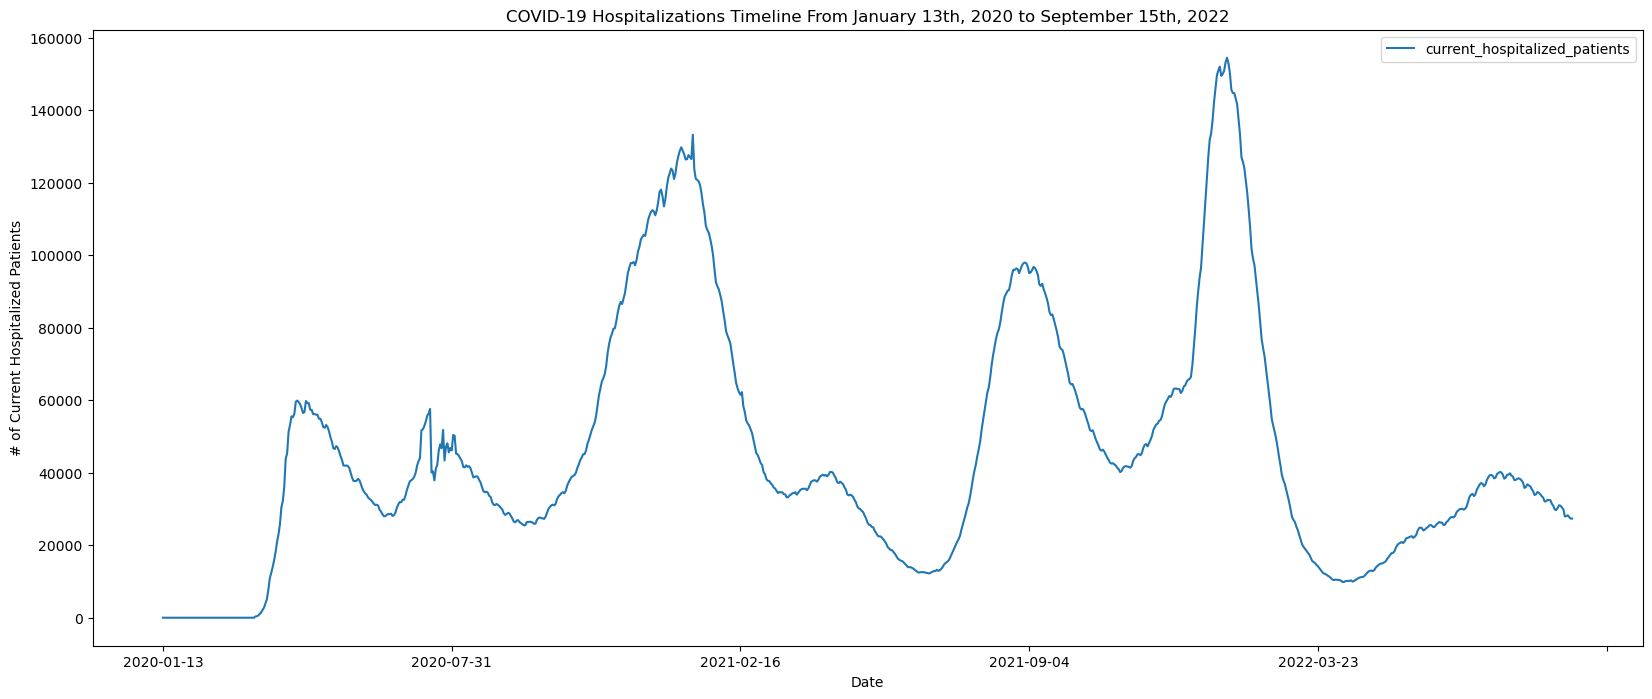

In [141]:
hospital_csv = pd.read_csv("../Project 1/Data/hospitalizations.csv")

hospital_df = pd.DataFrame(hospital_csv)
nHospital_df = hospital_df[["date", "location_key", "cumulative_hospitalized_patients", "current_hospitalized_patients"]]
nHospital_df = nHospital_df.loc[(nHospital_df["location_key"].str)[:2] == "US"]
nHospital_df = nHospital_df.loc[(nHospital_df["location_key"].str.len() <= 2)]

date_df = nHospital_df.groupby("date").max()
date_df.sort_values(by = "current_hospitalized_patients")
date_df.plot(y = "current_hospitalized_patients", kind = "line", figsize = (20, 8))
plt.title("COVID-19 Hospitalizations Timeline From January 13th, 2020 to September 15th, 2022")
plt.xlabel("Date")
plt.ylabel("# of Current Hospitalized Patients")
plt.savefig("hosp_timeline")
plt.show()

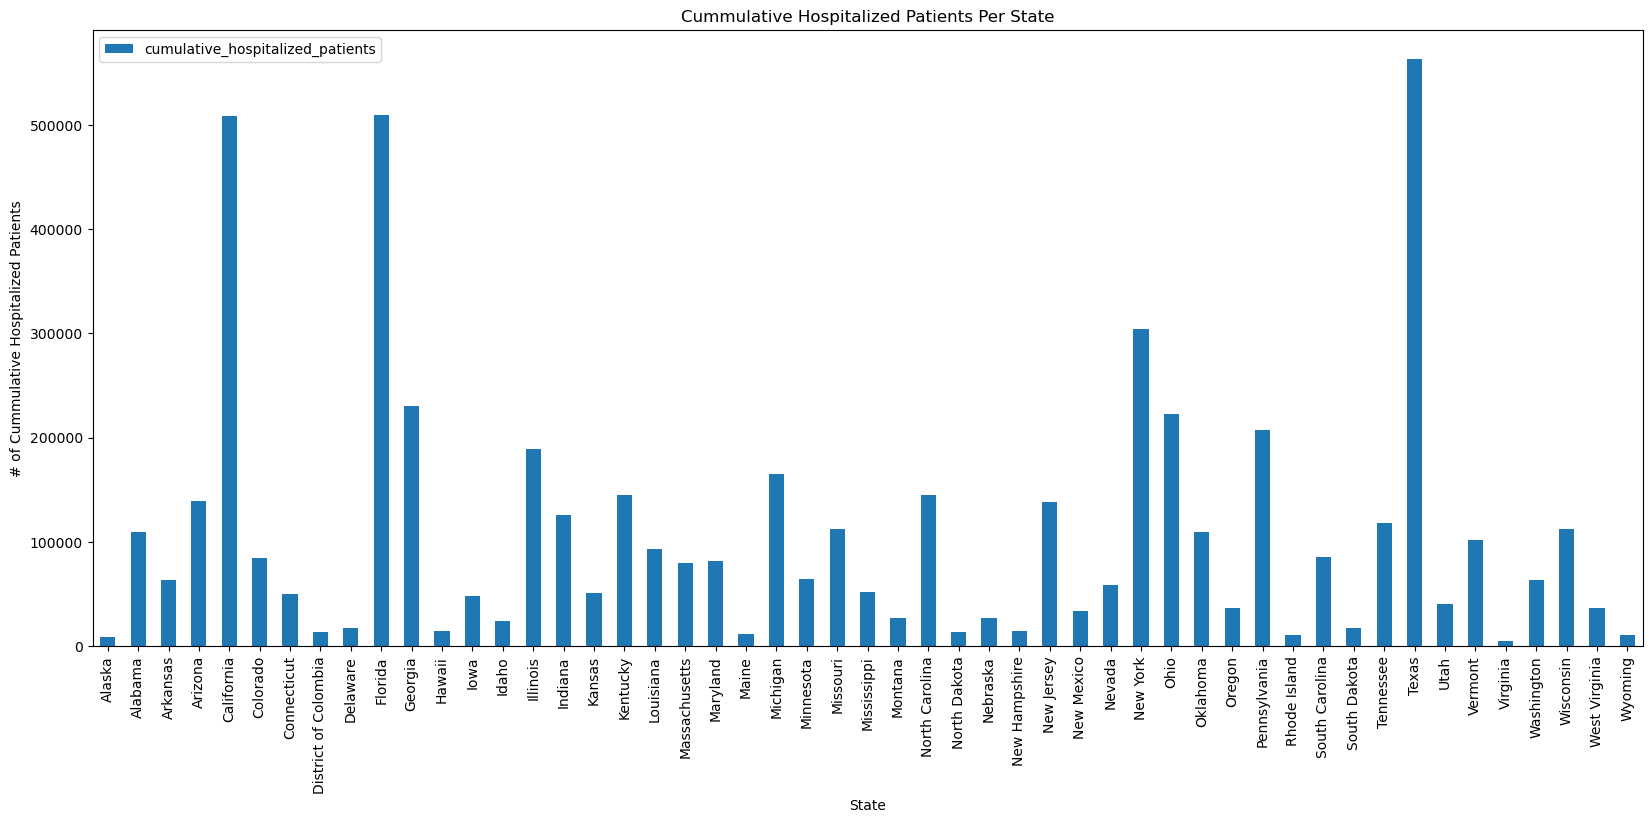

In [142]:
hospital_df = pd.DataFrame(hospital_csv)
to_merge_df = hospital_df[["date", "location_key", "cumulative_hospitalized_patients", "current_hospitalized_patients"]]
to_merge_df = to_merge_df.loc[(to_merge_df["location_key"].str)[:2] == "US"]
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_VI"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_CA_SFO"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_GU"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_AS"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_MP"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_PR"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_NY_36005"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_NY_36047"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_NY_36061"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_NY_36081"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_NY_36085"].index, inplace = True)
# to_merge_df.drop(to_merge_df[to_merge_df["location_key"] == "US_NY_NYC"].index, inplace = True)

drop_misc(to_merge_df)

to_merge_df["location_key"] = to_merge_df["location_key"].str[3:]

# states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Colombia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
# s_series = pd.Series(states)
#to_merge_df["location_key"] = s_series

to_merge_df = to_merge_df.groupby("location_key").max()

#to_merge_df.index = states
to_merge_df = to_merge_df.sort_index(ascending = True)
#to_merge_df

to_merge2 = states_df
#to_merge2["location_key"] = s_series 
#drop_misc(to_merge2)
to_merge2 = to_merge2.groupby("location_key").max()
to_merge_df.head()
#to_merge2.index = m_series
new_df = pd.merge(to_merge_df, to_merge2, on = "location_key")
new_df.index = states
new_df.sort_index(ascending = True)


new_df.plot(y = "cumulative_hospitalized_patients", kind = "bar", figsize = (20, 8))
plt.xlabel("State")
plt.ylabel("# of Cummulative Hospitalized Patients")
plt.title("Cummulative Hospitalized Patients Per State")
plt.xticks(range(len(states)), labels = states, rotation = 90)
plt.savefig("hosp_per_state")
plt.show()

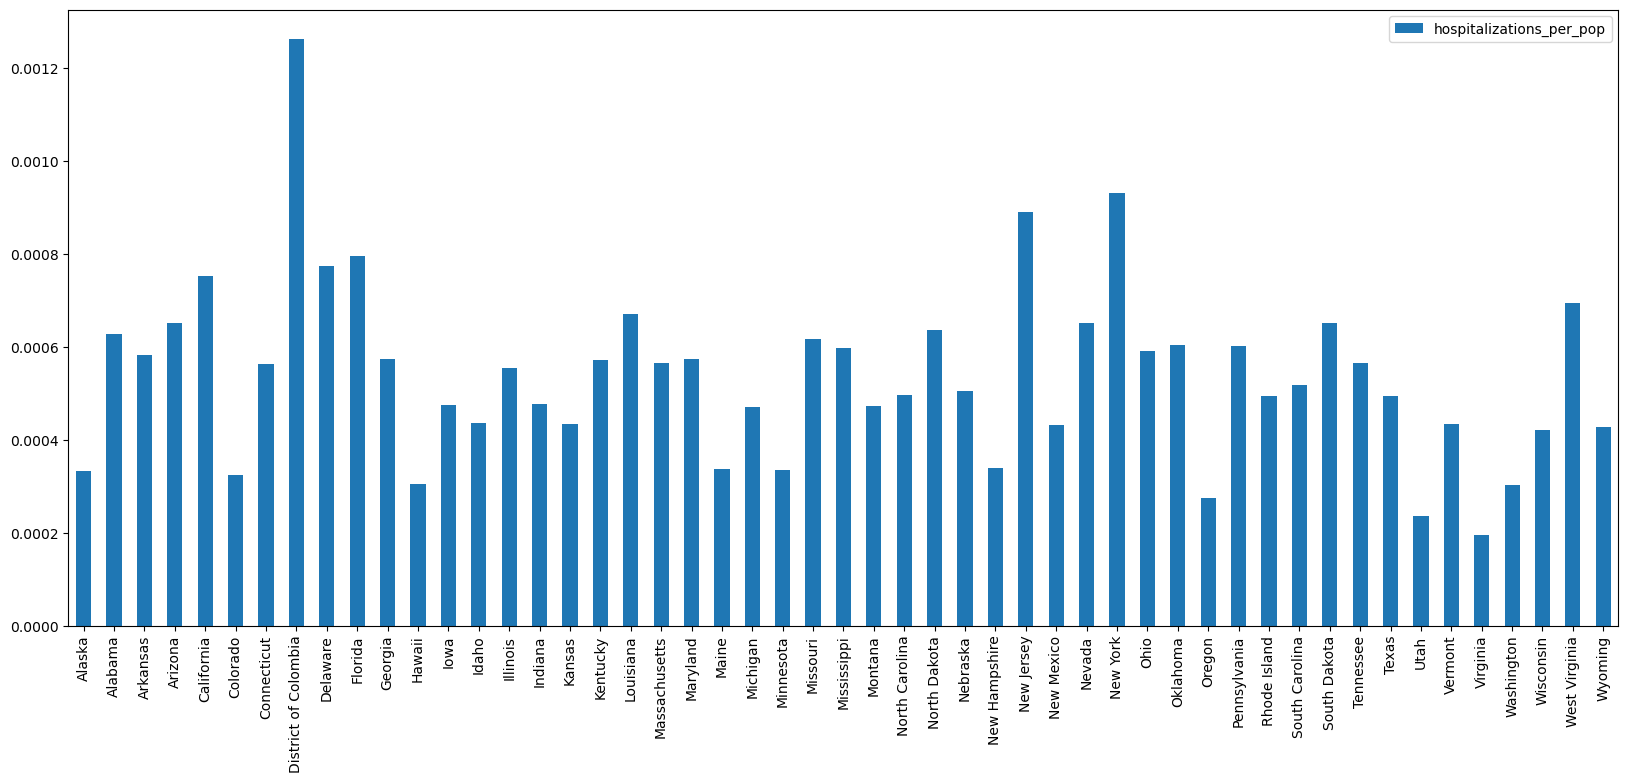

In [143]:
new_df["hospitalizations_per_pop"] = new_df["current_hospitalized_patients"] / new_df["population"]

new_df.plot(y = "hospitalizations_per_pop", kind = "bar", figsize = (20, 8))
plt.savefig("hosp_per_pop")
plt.show()

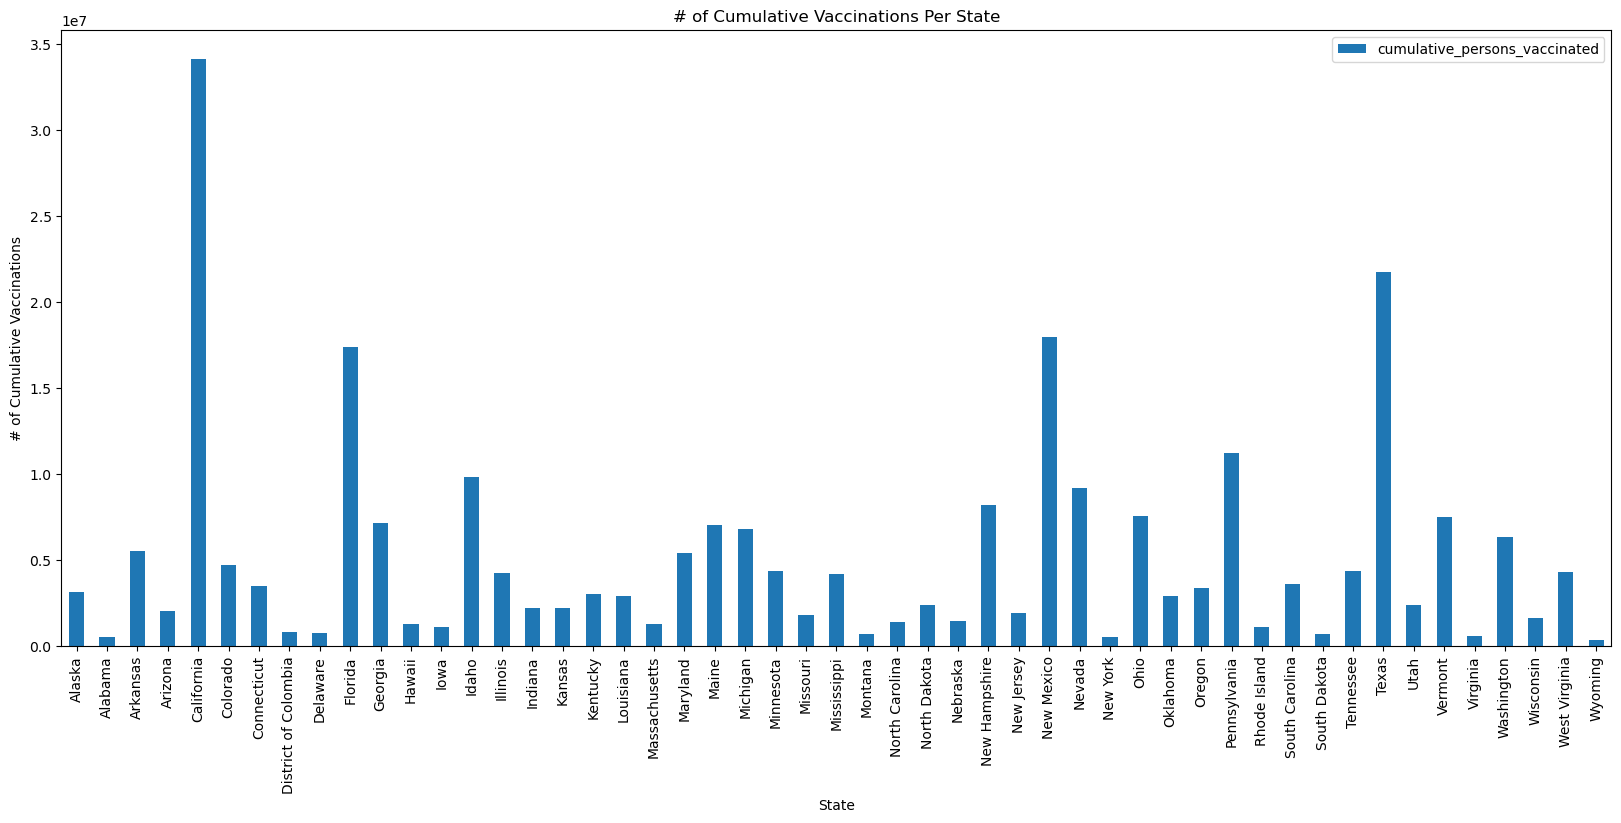

In [144]:
vaccine_csv = pd.read_csv("../Project 1/Data/vaccinations.csv")
vaccine_df = pd.DataFrame(vaccine_csv)
vaccine_df = vaccine_df[["date", "location_key", "cumulative_persons_vaccinated", "cumulative_vaccine_doses_administered"]]
vaccine_df = vaccine_df.loc[(vaccine_df["location_key"].str)[:2] == "US"]
us_vaccine_df = vaccine_df
us_vaccine_df = us_vaccine_df.loc[(us_vaccine_df["location_key"].str.len() <= 2)]

us_vaccine_df

states_vaccine_df = vaccine_df
drop_misc(states_vaccine_df)
# states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US"].index, inplace = True)
# states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US_VI"].index, inplace = True)
# states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US_AS"].index, inplace = True)
# states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US_GU"].index, inplace = True)
# states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US_MP"].index, inplace = True)
# states_vaccine_df.drop(states_vaccine_df[states_vaccine_df["location_key"] == "US_PR"].index, inplace = True)
states_vaccine_df["location_key"] = states_vaccine_df["location_key"].str[3:5]
states_vaccine_df = states_vaccine_df.dropna()
states_vaccine_df

cummulative_states_vaccine_df = states_vaccine_df.groupby("location_key").max()
cummulative_states_vaccine_df.index = states
cummulative_states_vaccine_df = cummulative_states_vaccine_df.sort_index(ascending = True)
cummulative_states_vaccine_df.plot(y = "cumulative_persons_vaccinated", xlabel = "State", ylabel = "# of Cumulative Vaccinations", title = "# of Cumulative Vaccinations Per State", kind = "bar", figsize = (20, 8))
plt.xticks(range(len(states)), labels = states, rotation = 90)
plt.savefig("num_vaccinations_per_state")
plt.show()

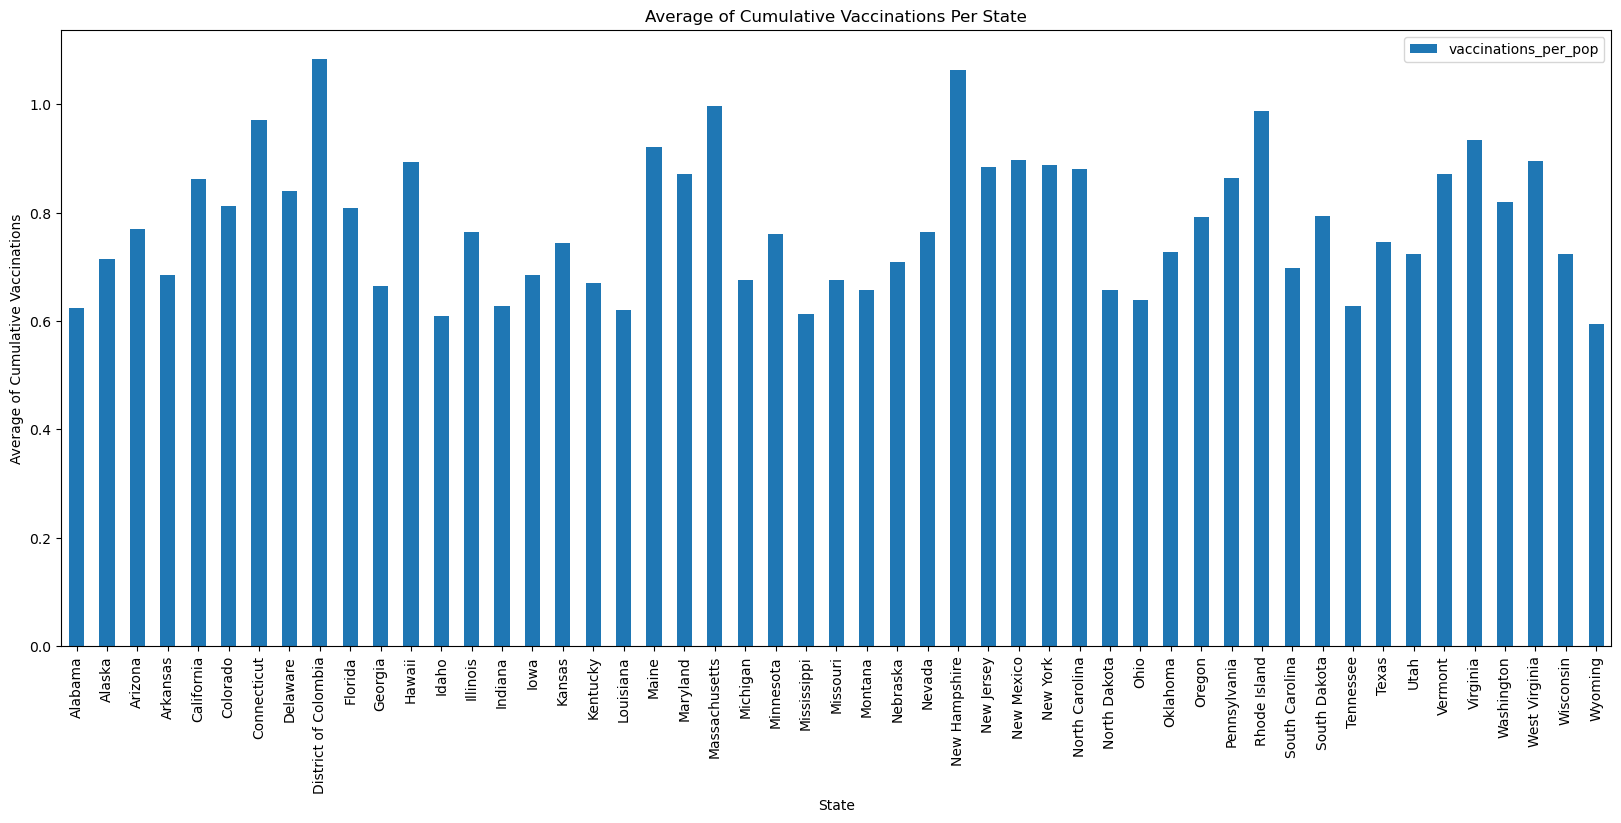

In [145]:
cummulative_states_vaccine_df["population"] = new_df["population"]

cummulative_states_vaccine_df["vaccinations_per_pop"] = cummulative_states_vaccine_df["cumulative_persons_vaccinated"].astype(int) / new_df["population"].astype(int) 
#cummulative_states_vaccine_df
cummulative_states_vaccine_df.plot(y = "vaccinations_per_pop", xlabel = "State", ylabel = "Average of Cumulative Vaccinations", title = "Average of Cumulative Vaccinations Per State", kind = "bar", figsize = (20, 8))
#plt.bar(y = cummulative_states_vaccine_df["cummulative_persons_vaccinated"] / new_df["population"], xlabel = "State", figsize = (20, 8))
#plt.xticks(range(len(states)), labels = states, rotation = 90)
#plt.show()
plt.savefig("avg_num_vaccinations_per_state")
plt.show()

C:\Users\eessd\AppData\Local\Temp\ipykernel_150824\3934436943.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  deaths_csv = pd.read_csv("../Project 1/Data/COVID-19_Deaths_by_Sex_and_Age(USA).csv")


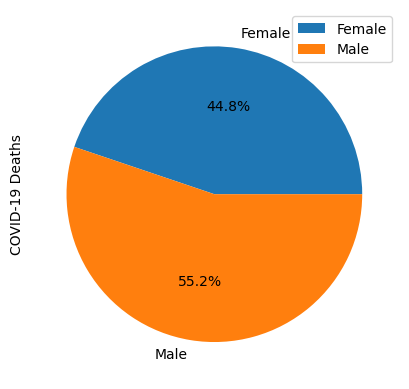

In [146]:
deaths_csv = pd.read_csv("../Project 1/Data/COVID-19_Deaths_by_Sex_and_Age(USA).csv")
deaths_df = pd.DataFrame(deaths_csv)
deaths_df.drop(["Footnote", "Year", "Month", "Pneumonia and COVID-19 Deaths", "Influenza Deaths"], axis = 1, inplace = True)
deaths_df = deaths_df.dropna()
deaths_df["COVID-19 Deaths"] = deaths_df["COVID-19 Deaths"].str.replace(",", "").astype(int)
deaths_df["Total Deaths"] = deaths_df["Total Deaths"].str.replace(",", "").astype(int)
deaths_df["Pneumonia Deaths"] = deaths_df["Pneumonia Deaths"].str.replace(",", "").astype(int)

deaths_df

gDeaths_df = deaths_df.groupby("Sex").max()
gDeaths_df.drop(["All Sexes"], inplace = True)
gDeaths_df
gDeaths_df.plot(y = "COVID-19 Deaths", kind = "pie", autopct="%1.1f%%")
plt.savefig("gender_death")
plt.show()

In [19]:
aDeaths_df = deaths_df.groupby("Age Group").max()

#aDeaths_df.plot(kind = "bar")
aDeaths_df
# 0
# 1 - 4
# 5 - 14
# 15 - 24
# 25 - 34
# 35 - 44
# 45 - 54
# 55 - 64
# 65 - 74
# 75 - 84
# 85+


,Data As Of,Start Date,End Date,Group,State,Sex,COVID-19 Deaths,Total Deaths,Pneumonia Deaths
Age Group,,,,,,,,,
0-17 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,621,62999,1132
1-4 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,68,6606,224
15-24 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,1896,68023,1779
18-29 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,4547,120068,4140
25-34 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,8186,142540,7059
30-39 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,13451,175271,11183
35-44 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,20810,208628,16957
40-49 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,32805,262196,26193
45-54 years,11/24/2021,12-01-2020,12/31/2020,By Year,Wyoming,Male,50793,372237,41661
